# Keras and Tensorflow > 2.0

https://www.youtube.com/watch?v=H6du_pfuznE

# Step 1: Import the data

In [135]:
import tensorflow 
import os
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [136]:
directory = '/Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/'
dataFiles = [f for f in listdir(directory) if isfile(join(directory, f))] 
for file in dataFiles:
    print(file)
    df = pd.read_csv(directory + file)

#for now, I will only use SF data 
location = '_SF'
df = pd.read_csv(directory + dataFiles[3])
df0 = pd.read_csv(directory + dataFiles[3])
df

SAC-NOAA-and-Megawatts.csv
SD-NOAA-and-Megawatts.csv
SD-yearAvg-NOAA-and-Megawatts.csv
SF-NOAA-and-Megawatts.csv
SAC-yearAvg-NOAA-and-Megawatts.csv
LA-yearAvg-NOAA-and-Megawatts.csv
LA-NOAA-and-Megawatts.csv
SF-yearAvg-NOAA-and-Megawatts.csv


,date,HLY_TEMP_NORMAL_SF,HLY_TEMP_10PCTL_SF,HLY_TEMP_90PCTL_SF,HLY_DEWP_NORMAL_SF,HLY_DEWP_10PCTL_SF,HLY_DEWP_90PCTL_SF,HLY_PRES_NORMAL_SF,HLY_PRES_10PCTL_SF,HLY_PRES_90PCTL_SF,...,HLY_WCHL_NORMAL_SF,HLY_WIND_AVGSPD_SF,HLY_WIND_PCTCLM_SF,HLY_WIND_VCTDIR_SF,HLY_WIND_VCTSPD_SF,HLY_WIND_1STDIR_SF,HLY_WIND_1STPCT_SF,HLY_WIND_2NDDIR_SF,HLY_WIND_2NDPCT_SF,Megawatts_2019
0,01-01T00:00:00,48.8,44.1,54.0,43.2,35.1,50.0,1020.1,1011.5,1026.9,...,47.3,6.3,25.4,196.0,1.1,5.0,14.7,4.0,14.3,283652.0
1,01-01T01:00:00,48.5,43.0,54.0,43.1,35.1,50.0,1019.9,1011.0,1026.8,...,47.0,6.2,28.5,193.0,1.2,4.0,14.6,5.0,13.1,252485.0
2,01-01T02:00:00,47.6,42.1,53.1,42.6,35.1,50.0,1020.0,1011.2,1026.8,...,46.0,6.2,26.5,184.0,0.9,4.0,14.8,6.0,12.5,245501.0
3,01-01T03:00:00,47.2,41.0,54.0,42.3,34.0,50.0,1020.0,1011.2,1026.9,...,45.5,6.2,24.9,178.0,1.1,4.0,16.3,5.0,13.5,241545.0
4,01-01T04:00:00,46.8,39.9,53.1,42.2,34.0,50.0,1019.8,1010.5,1026.6,...,45.0,5.9,27.9,175.0,0.8,4.0,15.6,7.0,11.2,241926.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,12-31T19:00:00,51.5,46.9,55.9,43.9,36.0,51.1,1019.5,1010.7,1026.4,...,50.3,7.7,17.8,255.0,1.9,7.0,22.4,4.0,14.0,308820.0
8756,12-31T20:00:00,51.0,46.0,55.0,43.6,36.0,51.1,1019.7,1011.2,1026.6,...,49.8,7.2,21.4,243.0,1.2,7.0,17.7,4.0,13.8,297758.0
8757,12-31T21:00:00,50.5,46.0,55.0,43.5,35.1,50.0,1019.9,1011.0,1026.8,...,49.1,7.1,18.7,218.0,1.3,7.0,18.7,4.0,16.5,287403.0
8758,12-31T22:00:00,49.8,45.0,54.0,43.4,35.1,50.0,1020.1,1011.5,1027.1,...,48.4,6.6,24.3,209.0,1.1,4.0,18.0,7.0,14.8,275322.0


In [137]:
df['date'] = pd.to_datetime(df['date'], format='%m-%dT%H:%M:%S')
df['date']= df["date"].map(lambda x: x.replace(year=2019))
df.index = df['date']

In [138]:
df.drop('date', axis=1, inplace=True)

In [158]:
# https://github.com/scikit-learn-contrib/sklearn-pandas/issues/41
from sklearn.preprocessing import MinMaxScaler
mapper = DataFrameMapper(df)
scaler = MinMaxScaler(feature_range=(0,1))
transformed = mapper.fit_transform(np.array(df['HLY_TEMP_NORMAL_SF'].values.reshape(-1, 1)))

In [159]:
zoop = scaler.inverse_transform(np.array(df['HLY_TEMP_NORMAL_SF']).reshape(-1,1))
print(zoop)

[[0.09266409]
 [0.08108108]
 [0.04633205]
 ...
 [0.15830116]
 [0.13127413]
 [0.11583012]]


In [148]:
scaler1 = MinMaxScaler(feature_range=(0,1))
aCol1 = scaler.fit_transform(np.array(df['HLY_DEWP_NORMAL_SF'].values.reshape(-1, 1)))
print(aCol1)

[[0.13103448]
 [0.12413793]
 [0.08965517]
 ...
 [0.15172414]
 [0.14482759]
 [0.14482759]]


In [149]:
zoop = scaler.inverse_transform(aCol1)
print(zoop)

[[43.2]
 [43.1]
 [42.6]
 ...
 [43.5]
 [43.4]
 [43.4]]


In [151]:
scaler1 = MinMaxScaler(feature_range=(0,1))
aCol2 = scaler.fit_transform(np.array(df['HLY_WIND_VCTSPD_SF'].values.reshape(-1, 1)))
print(aCol2)


[[0.05445545]
 [0.05940594]
 [0.04455446]
 ...
 [0.06435644]
 [0.05445545]
 [0.05940594]]


In [152]:
zoop = scaler.inverse_transform(aCol2)
print(zoop)

[[1.1]
 [1.2]
 [0.9]
 ...
 [1.3]
 [1.1]
 [1.2]]


In [98]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# df1 = df['Megawatts_2019']
# df1= scaler.fit_transform(np.array(df1.values.reshape(-1, 1)))
# df1
def scaleAllData(df):
    for column in df.columns:
#         df1 = df[column]
        df[column] = scaler.fit_transform(np.array(df[column].values.reshape(-1, 1)))
    return df

In [99]:
df = scaleAllData(df)
df

,HLY_TEMP_NORMAL_SF,HLY_TEMP_10PCTL_SF,HLY_TEMP_90PCTL_SF,HLY_DEWP_NORMAL_SF,HLY_DEWP_10PCTL_SF,HLY_DEWP_90PCTL_SF,HLY_PRES_NORMAL_SF,HLY_PRES_10PCTL_SF,HLY_PRES_90PCTL_SF,HLY_CLDH_NORMAL_SF,...,HLY_WCHL_NORMAL_SF,HLY_WIND_AVGSPD_SF,HLY_WIND_PCTCLM_SF,HLY_WIND_VCTDIR_SF,HLY_WIND_VCTSPD_SF,HLY_WIND_1STDIR_SF,HLY_WIND_1STPCT_SF,HLY_WIND_2NDDIR_SF,HLY_WIND_2NDPCT_SF,Megawatts_2019
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,0.092664,0.188889,0.030201,0.131034,0.155,0.090909,0.816327,0.478261,0.862595,0.0,...,0.100719,0.088757,0.723647,0.543175,0.054455,0.571429,0.052863,0.428571,0.202667,0.517104
2019-01-01 01:00:00,0.081081,0.148148,0.030201,0.124138,0.155,0.090909,0.795918,0.405797,0.854962,0.0,...,0.089928,0.082840,0.811966,0.534819,0.059406,0.428571,0.051395,0.571429,0.170667,0.455968
2019-01-01 02:00:00,0.046332,0.114815,0.000000,0.089655,0.155,0.090909,0.806122,0.434783,0.854962,0.0,...,0.053957,0.082840,0.754986,0.509749,0.044554,0.428571,0.054332,0.714286,0.154667,0.442268
2019-01-01 03:00:00,0.030888,0.074074,0.030201,0.068966,0.100,0.090909,0.806122,0.434783,0.862595,0.0,...,0.035971,0.082840,0.709402,0.493036,0.054455,0.428571,0.076358,0.571429,0.181333,0.434508
2019-01-01 04:00:00,0.015444,0.033333,0.000000,0.062069,0.100,0.090909,0.785714,0.333333,0.839695,0.0,...,0.017986,0.065089,0.794872,0.484680,0.039604,0.428571,0.066079,0.857143,0.120000,0.435255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,0.196911,0.292593,0.093960,0.179310,0.200,0.181818,0.755102,0.362319,0.824427,0.0,...,0.208633,0.171598,0.507123,0.707521,0.094059,0.857143,0.165932,0.428571,0.194667,0.566473
2019-12-31 20:00:00,0.177606,0.259259,0.063758,0.158621,0.200,0.181818,0.775510,0.434783,0.839695,0.0,...,0.190647,0.142012,0.609687,0.674095,0.059406,0.857143,0.096916,0.428571,0.189333,0.544774
2019-12-31 21:00:00,0.158301,0.259259,0.063758,0.151724,0.155,0.090909,0.795918,0.405797,0.854962,0.0,...,0.165468,0.136095,0.532764,0.604457,0.064356,0.857143,0.111601,0.428571,0.261333,0.524462


In [100]:
hly = df['HLY_TEMP_NORMAL_SF']

In [105]:
#EX: X has [48.8, 44.1, 54.0, ... , 0.999998] -> y[252485] (energy consumption data)
#this function is from : https://www.youtube.com/watch?v=kGdbPnMCdOg
def df_to_X_y(df, window_size= 5): #1 day of feature data
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [a for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [106]:
X, y = df_to_X_y(hly, 3) 
X.shape, y.shape

((8757, 3), (8757,))

In [103]:
X[0]

array([[0.09266409],
       [0.08108108],
       [0.04633205]])

In [104]:
zoop = scaler.inverse_transform(X[:10, 0].reshape(1,-1))
print(zoop)

[[67274.69111969 61369.72972973 43654.84555985 35781.56370656
  27908.28185328 23971.64092664 23971.64092664 27908.28185328
  35781.56370656 69243.01158301]]


In [176]:
train_percent = 0.9
validation_percent = 0.1

train_percent_split = int(train_percent * len(X))
validation_percent_split = int(validation_percent * len(X)) + train_percent_split
print(validation_percent_split)

X_train, y_train = X[:train_percent_split], y[:train_percent_split]
X_val, y_val = X[train_percent_split:validation_percent_split], y[train_percent_split:validation_percent_split] #validation

# just gonna have it hold like 1 day of prev data 
testData = validation_percent_split - 2
X_test, y_test = X[testData:], y[testData:]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

8756


((7881, 3, 1), (7881,), (875, 3, 1), (875,), (3, 3, 1), (3,))

In [177]:
print(X_test)
print(y_test)

[[[0.22393822]
  [0.1969112 ]
  [0.17760618]]

 [[0.1969112 ]
  [0.17760618]
  [0.15830116]]

 [[0.17760618]
  [0.15830116]
  [0.13127413]]]
[0.15830116 0.13127413 0.11583012]


# Step 4: Create a stacked LSTM

In [178]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [179]:
# model=Sequential()
# model.add(LSTM(64,return_sequences=True,input_shape=(1,31))) #100 steps, 1 feature 
# model.add(LSTM(64,return_sequences=True))
# model.add(LSTM(64))
# model.add(Dense(1))

# model.summary()

model1=Sequential()
model1.add(LSTM(64,return_sequences=True,input_shape=(3,1))) #100 steps, 1 feature 
model1.add(LSTM(128,return_sequences=True))
model1.add(LSTM(256, return_sequences= True))
model1.add(LSTM(128, return_sequences=True))
model1.add(LSTM(64))
model1.add(Dense(1))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 3, 64)             16896     
                                                                 
 lstm_11 (LSTM)              (None, 3, 128)            98816     
                                                                 
 lstm_12 (LSTM)              (None, 3, 256)            394240    
                                                                 
 lstm_13 (LSTM)              (None, 3, 128)            197120    
                                                                 
 lstm_14 (LSTM)              (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 756,545
Trainable params: 756,545
Non-tr

### Optimal epochs

https://www.geeksforgeeks.org/choose-optimal-number-of-epochs-to-train-a-neural-network-in-keras/

In [180]:
from keras import callbacks
from tensorflow.keras.losses import MeanSquaredError

model.compile(loss = MeanSquaredError(), optimizer ="rmsprop", metrics = ['accuracy'])
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True, verbose = 1)
  
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size = 48, 
                    epochs = 35, 
                    callbacks =[earlystopping])

Epoch 1/35
165/165 [==============================] - 10s 28ms/step - loss: 0.0013 - accuracy: 6.3444e-04 - val_loss: 0.0026 - val_accuracy: 0.0023
Epoch 2/35
165/165 [==============================] - 3s 19ms/step - loss: 0.0010 - accuracy: 6.3444e-04 - val_loss: 4.2291e-04 - val_accuracy: 0.0023
Epoch 3/35
165/165 [==============================] - 3s 17ms/step - loss: 9.7300e-04 - accuracy: 6.3444e-04 - val_loss: 0.0023 - val_accuracy: 0.0023
Epoch 4/35
165/165 [==============================] - 3s 18ms/step - loss: 9.0938e-04 - accuracy: 6.3444e-04 - val_loss: 0.0066 - val_accuracy: 0.0023
Epoch 5/35
165/165 [==============================] - 3s 17ms/step - loss: 8.8521e-04 - accuracy: 6.3444e-04 - val_loss: 2.7644e-04 - val_accuracy: 0.0023
Epoch 6/35
165/165 [==============================] - 3s 17ms/step - loss: 8.9360e-04 - accuracy: 6.3444e-04 - val_loss: 0.0014 - val_accuracy: 0.0023
Epoch 7/35
165/165 [==============================] - 3s 17ms/step - loss: 8.7134e-04 - accur

In [181]:
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.optimizers import Adam

cp1 = ModelCheckpoint(directory+'model1/', save_best_only = True) #I want to only save the best model (lowest validation loss)
model.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate = 0.0001), metrics = [RootMeanSquaredError()])

In [182]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 8, callbacks = [cp1])

Epoch 1/8
244/247 [============================>.] - ETA: 0s - loss: 3.1411e-04 - root_mean_squared_error: 0.0177

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


247/247 [==============================] - 21s 64ms/step - loss: 3.1427e-04 - root_mean_squared_error: 0.0177 - val_loss: 2.9688e-04 - val_root_mean_squared_error: 0.0172
Epoch 2/8
246/247 [============================>.] - ETA: 0s - loss: 2.9155e-04 - root_mean_squared_error: 0.0171

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


247/247 [==============================] - 15s 60ms/step - loss: 2.9150e-04 - root_mean_squared_error: 0.0171 - val_loss: 2.5060e-04 - val_root_mean_squared_error: 0.0158
Epoch 3/8
243/247 [============================>.] - ETA: 0s - loss: 2.8890e-04 - root_mean_squared_error: 0.0170

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


247/247 [==============================] - 15s 60ms/step - loss: 2.8893e-04 - root_mean_squared_error: 0.0170 - val_loss: 2.3157e-04 - val_root_mean_squared_error: 0.0152
Epoch 4/8
247/247 [==============================] - 3s 14ms/step - loss: 2.8591e-04 - root_mean_squared_error: 0.0169 - val_loss: 2.4061e-04 - val_root_mean_squared_error: 0.0155
Epoch 5/8
247/247 [==============================] - 3s 13ms/step - loss: 2.8356e-04 - root_mean_squared_error: 0.0168 - val_loss: 2.6004e-04 - val_root_mean_squared_error: 0.0161
Epoch 6/8
247/247 [==============================] - 3s 13ms/step - loss: 2.8141e-04 - root_mean_squared_error: 0.0168 - val_loss: 2.5637e-04 - val_root_mean_squared_error: 0.0160
Epoch 7/8
243/247 [============================>.] - ETA: 0s - loss: 2.8018e-04 - root_mean_squared_error: 0.0167

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


247/247 [==============================] - 15s 60ms/step - loss: 2.8060e-04 - root_mean_squared_error: 0.0168 - val_loss: 2.2939e-04 - val_root_mean_squared_error: 0.0151
Epoch 8/8
247/247 [==============================] - 3s 14ms/step - loss: 2.7914e-04 - root_mean_squared_error: 0.0167 - val_loss: 2.8991e-04 - val_root_mean_squared_error: 0.0170


In [183]:
# model1 = Sequential()
# model1.add(InputLayer((1,31))) #1 time steps, 31 variables of input
# model1.add(LSTM(64)) #how many windows do we want to slide across
# model1.add(Dense(8, 'relu'))
# model1.add(Dense(1, 'linear')) #linear value, pos or neg (for temp)
# model1.summary()

# #2 layers because adding more takes more time? 

In [184]:
# cp1 = ModelCheckpoint(directory+'model1/', save_best_only = True) #I want to only save the best model (lowest validation loss)
# model1.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate = 0.0001), metrics = [RootMeanSquaredError()])

In [185]:
# model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 30, callbacks = [cp1])

In [186]:
# model2=Sequential()
# model2.add(LSTM(64,return_sequences=True,input_shape=(1,31))) #100 steps, 1 feature 
# model2.add(LSTM(64,return_sequences=True))
# model2.add(LSTM(64))
# model2.add(Dense(8, 'relu'))
# model2.add(Dense(1, 'linear')) #linear value, pos or neg (for temp)

# model2.summary()

In [187]:
# cp2 = ModelCheckpoint(directory+'model2/', save_best_only = True) #I want to only save the best model (lowest validation loss)
# model2.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate = 0.0001), metrics = [RootMeanSquaredError()])

In [188]:
# model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 30, callbacks = [cp2])

In [189]:
train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data = {'Train Predictions': train_predictions, 'Actuals':y_train})
train_results

,Train Predictions,Actuals
0,0.029148,0.030888
1,0.037890,0.015444
2,0.019920,0.007722
3,0.020007,0.007722
4,0.026028,0.015444
...,...,...
7876,0.149569,0.154440
7877,0.180507,0.196911
7878,0.247303,0.277992
7879,0.364338,0.335907


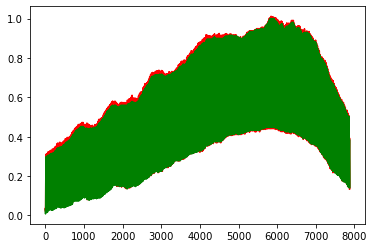

In [190]:
plt.plot(train_results['Train Predictions'][:], color = 'red')
plt.plot(train_results['Actuals'][:], color = 'green')

In [191]:
val_predictions = model.predict(X_val).flatten()
val_results = pd.DataFrame(data = {'Val Predictions': val_predictions, 'Actuals':y_val})
val_results

,Val Predictions,Actuals
0,0.425794,0.420849
1,0.456362,0.455598
2,0.486993,0.478764
3,0.495421,0.490347
4,0.494908,0.463320
...,...,...
870,0.229275,0.223938
871,0.205533,0.196911
872,0.183747,0.177606
873,0.172441,0.158301


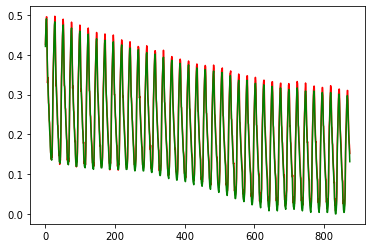

In [192]:
plt.plot(val_results['Val Predictions'][:], color = 'red')
plt.plot(val_results['Actuals'][:], color = 'green')

# Step 5: Predict into the future

In [193]:
import tensorflow as tf

In [197]:
print(X_test)
print(y_test)

[[[0.22393822]
  [0.1969112 ]
  [0.17760618]]

 [[0.1969112 ]
  [0.17760618]
  [0.15830116]]

 [[0.17760618]
  [0.15830116]
  [0.13127413]]]
[0.15830116 0.13127413 0.11583012]


In [198]:
blep = scaler.inverse_transform(X_test[:].reshape(1,-1)) #do i need to worry about this?? hm 
megawatts_y = scaler.inverse_transform(y_test[:].reshape(1,-1))
print(blep)
print(megawatts_y)

ValueError: operands could not be broadcast together with shapes (1,9) (31,) (1,9) 

In [ ]:
# we want to use december 31st weather and megawatts data, so append y_test and remove the last value in X_test (megawatts data)
lastDay_input = X_test[0][0][:-1]
print(lastDay_input)
lastDay_input=np.append(lastDay_input,y_test).reshape(1,-1)
lastDay_input.shape


In [ ]:
print(lastDay_input)
lastDay_input.shape

In [683]:
lastDay_input=list(lastDay_input)
lastDay_input=lastDay_input[0].tolist()

In [684]:
print(lastDay_input)
print(len(lastDay_input))
# why is there a negative value???

[0.13127413127413123, 0.2222222222222221, 0.030201342281879207, 0.14482758620689662, 0.15500000000000003, 0.09090909090909083, 0.8163265306122582, 0.4782608695652186, 0.8778625954198418, 0.0, 0.8162162162162163, 0.49878934624697324, 0.12418300653594777, 0.12890625, 0.49038461538461553, 0.6240963855421686, 0.13127413127413123, 0.14028776978417268, 0.10650887573964496, 0.6923076923076923, 0.5793871866295265, 0.05445544554455446, 0.42857142857142855, 0.10132158590308368, 0.8571428571428572, 0.21600000000000003, -0.5000000000101035, 0.8660254037786054, -0.003583904219171452, 0.9999935777946516, 0.43459233613511317]
31


In [701]:
# df.iloc[:1, :-1] #doesn't include megawatts
df.iloc[0:1, :-1] #doesn't include megawatts

,HLY_TEMP_NORMAL_SF,HLY_TEMP_10PCTL_SF,HLY_TEMP_90PCTL_SF,HLY_DEWP_NORMAL_SF,HLY_DEWP_10PCTL_SF,HLY_DEWP_90PCTL_SF,HLY_PRES_NORMAL_SF,HLY_PRES_10PCTL_SF,HLY_PRES_90PCTL_SF,HLY_CLDH_NORMAL_SF,...,HLY_WIND_VCTDIR_SF,HLY_WIND_VCTSPD_SF,HLY_WIND_1STDIR_SF,HLY_WIND_1STPCT_SF,HLY_WIND_2NDDIR_SF,HLY_WIND_2NDPCT_SF,Day sin,Day cos,Year sin,Year cos
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,0.092664,0.188889,0.030201,0.131034,0.155,0.090909,0.816327,0.478261,0.862595,0.0,...,0.543175,0.054455,0.571429,0.052863,0.428571,0.202667,-5.030095e-12,1.0,0.002021,0.999998


In [692]:
# weatherDat = df.iloc[:1, :-1]
# weatherDat = list(weatherDat.values)
# weatherDat = weatherDat[0].tolist()
# print(len(weatherDat))
# print(weatherDat)

In [698]:
#pulling the weather data of the days that you're trying to predict
#input/output:[weather,data,per,hour,for,specific,day,thatDayEnergyConsumption] -> nextDayEnergyConsumption
def futureWeatherData(df, days):
    allDays = []
    for i in range(1, days+1):
        aDay = df.iloc[i:i+1, :-1]
        aDay = list(aDay.values)
        aDay = aDay[0].tolist()
        allDays.append(aDay)
    return allDays

allWeatherData = futureWeatherData(df, 2)
print(allWeatherData)

[[0.08108108108108114, 0.14814814814814814, 0.030201342281879207, 0.124137931034483, 0.15500000000000003, 0.09090909090909083, 0.7959183673469425, 0.4057971014492807, 0.8549618320610648, 0.0, 0.8864864864864865, 0.5907990314769974, 0.11764705882352944, 0.14453125, 0.2852564102564103, 0.6843373493975903, 0.08108108108108114, 0.08992805755395672, 0.08284023668639057, 0.811965811965812, 0.5348189415041783, 0.0594059405940594, 0.42857142857142855, 0.05139500734214392, 0.5714285714285714, 0.17066666666666663, 0.25881904509256404, 0.9659258262917362, 0.002738105263628894, 0.9999962513827566], [0.04633204633204646, 0.1148148148148147, 0.0, 0.0896551724137935, 0.15500000000000003, 0.09090909090909083, 0.8061224489795933, 0.4347826086956559, 0.8549618320610648, 0.0, 0.9351351351351351, 0.6174334140435834, 0.10239651416122009, 0.13671875, 0.24679487179487186, 0.7060240963855422, 0.04633204633204646, 0.05395683453237399, 0.08284023668639057, 0.754985754985755, 0.50974930362117, 0.0445544554455445

In [687]:
from numpy import array

def futurePredictions(lastDay_input, weatherData, hourPred, n_steps):
    future_outputs=[]
    i=0
    while(i<=hourPred): #for the next thirty hours
        if i == 0: #for the first new predicted value, using old weather data to predict new value 
            lastDay_input = np.array(lastDay_input)
            lastDay_input = lastDay_input.reshape(1,1,n_steps)
            yhat = model.predict(lastDay_input, verbose=0)#.flatten()
            print(yhat[0])
            future_outputs.extend(yhat.tolist())
            i=i+1
        else:# then take from the 1 position and getting the new input and putting it into input
            weatherData.append(future_outputs[0][-1]) #add the new megawatts prediction into the set 
            weatherData = np.array(weatherData)
            print("{} hour input {}".format(i,weatherData))
            weatherData=weatherData.reshape(1,-1)
            weatherData = weatherData.reshape((1, 1, n_steps)) #works
            yhat = model.predict(weatherData, verbose=0)
            print("{} hour output {}".format(i,yhat))
            future_outputs.extend(yhat.tolist())
            i=i+1

    return future_outputs
    
lst_output = futurePredictions(lastDay_input, weatherDat, 1, 31)

[0.43932855]
1 hour input [ 9.26640927e-02  1.88888889e-01  3.02013423e-02  1.31034483e-01
  1.55000000e-01  9.09090909e-02  8.16326531e-01  4.78260870e-01
  8.62595420e-01  0.00000000e+00  8.70270270e-01  5.90799031e-01
  1.17647059e-01  1.56250000e-01  3.17307692e-01  6.55421687e-01
  9.26640927e-02  1.00719424e-01  8.87573964e-02  7.23646724e-01
  5.43175487e-01  5.44554455e-02  5.71428571e-01  5.28634361e-02
  4.28571429e-01  2.02666667e-01 -5.03009464e-12  1.00000000e+00
  2.02132493e-03  9.99997957e-01  4.39328551e-01]
1 hour output [[0.42897743]]


In [607]:
# from numpy import array

# def futurePredictions(temp_input, x_input, hourPred, n_steps):
#     future_outputs=[]
#     i=0
#     initDataSize = len(temp_input)
#     while(i<hourPred): #for the next thirty hours

#         if(len(temp_input)>initDataSize): # then take from the 1 position and getting the new input and putting it into input
#             print(temp_input)
#             x_input=np.array(temp_input[1:])
#             print("{} hour input {}".format(i,x_input))
#             x_input=x_input.reshape(1,-1)
#             x_input = x_input.reshape((1, 1, n_steps)) #works
#             yhat = model.predict(x_input, verbose=0)
#             print("{} hour output {}".format(i,yhat))
#             temp_input.extend(yhat[0].tolist())
#             temp_input=temp_input[1:]
#             #print(temp_input)
#             future_outputs.extend(yhat.tolist())
#             i=i+1
#         else: #for the first new predict, using old values to predict new value 
#             x_input = x_input.reshape((1, 1, n_steps)) #works 
#             print("input shape: ", x_input.shape)
#             yhat = model.predict(x_input, verbose=0)#.flatten()
#             print(yhat[0])
#             temp_input.extend(yhat[0].tolist())
#             print(len(temp_input))
#             future_outputs.extend(yhat.tolist())
#             i=i+1
#     return future_outputs
    
# lst_output = futurePredictions(temp_input, x_input,24,31)

# Check if it works

:/ scary

In [688]:
lst_output

[[0.43932855129241943], [0.42897742986679077]]

In [482]:
# df[startPos:]['Megawatts_2019']
# boop = np.array(df[startPos:]['Megawatts_2019'].values.reshape(-1, 1))

# plt.plot(day_new,scaler.inverse_transform(boop))
# plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [689]:
# use previous day of prediction?? see if what you're doing makes sense by tracing data 
predictions = scaler.inverse_transform(lst_output)

In [690]:
# next 30 hours???
print(predictions)

[[244002.49880612]
 [238725.54885894]]


In [98]:
check_directory = '/Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_2020/'

In [107]:
compFiles = [f for f in listdir(check_directory) if isfile(join(check_directory, f))] 
flies = []
for file in compFiles:
    print(file)
    flies.append(check_directory + file)
df1 = pd.read_csv(flies[2])

SAC-NOAA-and-Megawatts.csv
SD-NOAA-and-Megawatts.csv
SF-NOAA-and-Megawatts.csv
LA-NOAA-and-Megawatts.csv


In [115]:
print(df1['Megawatts_2020'][:30])

0     273786.0
1     243000.0
2     235962.0
3     231944.0
4     230219.0
5     235383.0
6     243281.0
7     243793.0
8     237974.0
9     228866.0
10    221268.0
11    216362.0
12    214476.0
13    216342.0
14    227833.0
15    242087.0
16    263675.0
17    294908.0
18    299952.0
19    296337.0
20    289061.0
21    278538.0
22    262639.0
23    246686.0
24    256323.0
25    229176.0
26    224148.0
27    224283.0
28    232189.0
29    249193.0
Name: Megawatts_2020, dtype: float64


In [489]:
df.iloc[:1, :-1]

,HLY_TEMP_NORMAL_SF,HLY_TEMP_10PCTL_SF,HLY_TEMP_90PCTL_SF,HLY_DEWP_NORMAL_SF,HLY_DEWP_10PCTL_SF,HLY_DEWP_90PCTL_SF,HLY_PRES_NORMAL_SF,HLY_PRES_10PCTL_SF,HLY_PRES_90PCTL_SF,HLY_CLDH_NORMAL_SF,...,HLY_WIND_VCTDIR_SF,HLY_WIND_VCTSPD_SF,HLY_WIND_1STDIR_SF,HLY_WIND_1STPCT_SF,HLY_WIND_2NDDIR_SF,HLY_WIND_2NDPCT_SF,Day sin,Day cos,Year sin,Year cos
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,0.092664,0.188889,0.030201,0.131034,0.155,0.090909,0.816327,0.478261,0.862595,0.0,...,0.543175,0.054455,0.571429,0.052863,0.428571,0.202667,-5.030095e-12,1.0,0.002021,0.999998
